In [ ]:
# 6.5 Eco Friendly Fashion Analysis- K-Means Cluster Analysis

# Table of Contents - this script contains the following

In [ ]:
01 Importing Libraries

In [ ]:
02 Importing Data

In [ ]:
03 Data Wrangling

In [ ]:
04 Elbow Technique

# 01 Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans #here you import the kmeans algorithm from scikit-learn
import pylab as pl #Pylab is a convenience module that bulk imports matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [134]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02 Importing Data

In [137]:
#creating path
path=r'/Users/serenakunzmann/Documents/CareerFoundry-Python/05-2025 EcoFashion Insights 2024 /Data/'

In [139]:
ef=pd.read_csv(os.path.join(path,'Prepared Data','cleaned_derived_sustainable_fashon_csv'), index_col=False)

In [141]:
df=pd.read_csv(os.path.join(path,'Prepared Data','cleaned_sustainable_fashon_csv'), index_col=False)

In [143]:
ag=pd.read_csv(os.path.join(path,'Prepared Data','cleaned_derived_sustainable_fashon_csv'), index_col=False)

# 03 Data Wrangling

In [146]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,0,0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,1,1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,2,2,BRAND-0003,Brand_3,United States of America,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,3,3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,4,4,BRAND-0005,Brand_5,United States of America,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [148]:
df=df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [150]:
df.columns


Index(['Brand_ID', 'Brand_Name', 'Country', 'Year', 'Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Carbon_Footprint_MT',
       'Water_Usage_Liters', 'Waste_Production_KG', 'Recycling_Programs',
       'Product_Lines', 'Average_Price_USD', 'Market_Trend', 'Certifications'],
      dtype='object')

In [152]:
#drop categorical columns
df_num=df.drop(columns = ['Brand_ID','Brand_Name','Country','Sustainability_Rating',
       'Material_Type', 'Eco_Friendly_Manufacturing', 'Market_Trend','Recycling_Programs', 'Certifications'])

In [154]:
df_num

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
0,2018,1.75,4511152.79,97844.11,2,38.33
1,2015,124.39,1951566.31,37267.75,15,250.07
2,2024,336.66,467454.52,38385.92,2,146.16
3,2023,152.04,899576.90,32665.45,13,165.52
4,2016,415.63,1809219.90,37295.47,19,211.63
...,...,...,...,...,...,...
4995,2010,423.73,251736.61,50532.28,1,490.95
4996,2012,68.24,2342347.78,64214.57,13,53.92
4997,2023,321.12,317800.67,81467.21,12,431.32
4998,2016,124.83,927539.68,34506.22,20,322.95


In [156]:
# creating loc functions on full dataframe - derived variable
df_num.loc[df_num['Average_Price_USD']>300, 'Price_Range']='High-range product'

In [158]:
df_num.loc[(df_num['Average_Price_USD'] <=300) & (df_num['Average_Price_USD'] > 150), 'Price_Range']='Mid-range product'

In [160]:
df_num.loc[df_num['Average_Price_USD'] <= 150, 'Price_Range']='Low-range product'

In [162]:
df_num['Price_Range'].value_counts(dropna=False)

Price_Range
High-range product    2049
Mid-range product     1615
Low-range product     1336
Name: count, dtype: int64

In [164]:
df_num.columns


Index(['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters',
       'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD',
       'Price_Range'],
      dtype='object')

# 04 Elbow Technique

In [167]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [169]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

ValueError: could not convert string to float: 'Low-range product'

In [171]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

NameError: name 'score' is not defined

There's a large jump from two to three on the x-axis, and a smaller jump from three to four, then curve straightens out. This means that the optimal count for your clusters is four

# 05 K-Means Clustering

In [175]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [177]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

ValueError: could not convert string to float: 'Low-range product'

In [179]:
df_num['clusters'] = kmeans.fit_predict(df_num)

ValueError: could not convert string to float: 'Low-range product'

In [181]:
df_num['clusters'].value_counts()

KeyError: 'clusters'

In [183]:
# Plot the clusters for the "Product Lines" and "Waste Production" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Product_Lines'], y=df_num['Waste_Production_KG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('# of Products') # Label x-axis.
plt.ylabel('Volume of Waste') # Label y-axis.
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

Observation: No correlation between waste production volume and # of product lines a Brand has

In [186]:
# Plot the clusters for the "Product lines" and "Carbon" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Product_Lines'], y=df_num['Carbon_Footprint_MT'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('# of Product Lines') 
plt.ylabel('Carbon Footprint') 
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

Obervations: There is no correlation between CarbonFootprint and # of product lines a Brand has

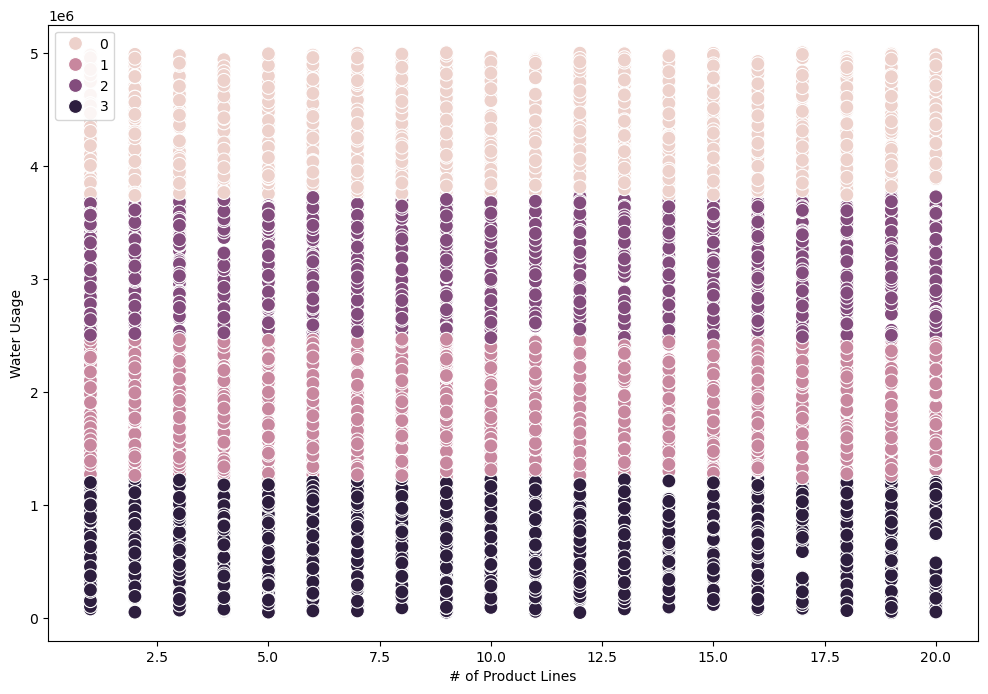

In [412]:
# Plot the clusters for the "Product lines" and "water usage" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Product_Lines'], y=df_num['Water_Usage_Liters'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('# of Product Lines') 
plt.ylabel('Water Usage') 
plt.show()

Observation: 
Cluster 0 (lightest): Contains most points with high water usage across all product line counts.Cluster 3 (darkest): Represents points with low water usage across all product line counts.Intermediate clusters (1, 2) represent varying levels of water use.

Water Useage Patterns & Sustainability Insights: 
Cluster 3 (dark) is likely the most water-efficient. Brands in Cluster 0 are potentially less sustainable in terms of water usage.
Product lines alone do not determine water usage. Other features (e.g. manufacturing practices, material types) may influence which cluster a point falls into.


Recommendations: Examine means/medians of water usage and other sustainability metrics per cluster. Label and highlight centroids: To show where clusters are centered.Normalize or log-transform water usage if scale is skewing patterns.

In [415]:
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'light purple'
df_num.loc[df_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'pink'

In [484]:
df_num.groupby('cluster').agg({'Carbon_Footprint_MT':['mean', 'median'], 
                         'Waste_Production_KG':['mean', 'median'], 
                         'Product_Lines':['mean', 'median'],
                          'Average_Price_USD':['mean', 'median'],'Water_Usage_Liters':['mean', 'median','max']})

Carbon_Footprint_MT         Waste_Production_KG            \
                            mean  median                mean    median   
cluster                                                                  
dark purple           257.048601  261.15        49329.986861  48951.22   
light purple          249.272727  249.48        49424.837258  49049.48   
pink                  247.337914  249.43        49857.738467  50051.57   
purple                247.964715  243.15        51810.356313  52387.06   

             Product_Lines        Average_Price_USD          \
                      mean median              mean  median   
cluster                                                       
dark purple      10.263114   10.0        253.867694  249.23   
light purple     10.216706   10.0        263.273459  265.11   
pink             10.609339   11.0        258.818739  256.51   
purple           10.628112   11.0        261.204723  261.49   

             Water_Usage_Liters                          
                           mean      median         max  
cluster                                                  
dark purple        6.471918e+05   649273.84  1242219.44  
light purple       1.845073e+06  1842250.22  2469601.61  
pink               4.361577e+06  4349678.82  4999596.61  
purple             3.105227e+06  3113929.29  3731017.24

In [122]:
# creating eco efficieny score: Tells you how much economic value (price) a product or brand provides per unit of environmental harm (carbon, waste, and water use)
df_num ['Eco_Efficiency'] = df_num['Average_Price_USD']/(df_num['Carbon_Footprint_MT']+df_num['Waste_Production_KG']+df_num['Water_Usage_Liters']/1000)

In [124]:
# Creating material age derived field
df_num['Material Age'] = 2024 - df_num['Year']

In [126]:
df_num.head()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD,Price_Range,Eco_Efficiency,Material Age
0,2018,1.75,4511152.79,97844.11,2,38.33,Low-range product,0.000374,6
1,2015,124.39,1951566.31,37267.75,15,250.07,Mid-range product,0.006356,9
2,2024,336.66,467454.52,38385.92,2,146.16,Low-range product,0.003730,0
3,2023,152.04,899576.90,32665.45,13,165.52,Mid-range product,0.004909,1
4,2016,415.63,1809219.90,37295.47,19,211.63,Mid-range product,0.005355,8


In [478]:
#exporting new dataset with derived fields
df_num.to_csv(os.path.join(path,'Prepared Data','cleaned_derived_sustainable_fashon_csv'))

In [128]:
# Plot the clusters for the "year" and "eco efficiency" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Year'], y=df_num['Material Age'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Material Age') 
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

In [130]:
# Plot the clusters for the "year" and "eco efficiency" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Year'], y=df_num['Eco_Efficiency'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Eco_Efficiency') 
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
Observations: We see a trend of rising Eco_Efficiency Scores from 2019-2023. We also see a concentrated rise of higher Eco_ Efficiency Scores in 2011 & 2015 - both 1 year before an election/final presidential terms  

In [ ]:
Presidential Terms:
Election Year 2008 Obama
Election Year 2012 Obama
Election Year 2016 Trump
Election Year 2020 Biden
Election Year 2024 Trump

Obama 2009-2017
Trump 2017-2021
Biden 2021-2024


In [ ]:
#creating derived field columns for Election Year y/n and Presidential Term

In [94]:
ef['Election Year'] = np.where(ef['Year'] == 2008, 'Yes', 'No')

In [96]:
ef['Presidential Term'] = np.where((ef['Year'] >= 2009) & (ef['Year'] <= 2016), 'Obama',
                            np.where((ef['Year'] >= 2017) & (ef['Year'] <= 2020), 'Trump',
                            np.where((ef['Year'] >= 2021) & (ef['Year'] <= 2024), 'Biden',
                            np.where((ef['Year'] >= 2025), 'Trump', 'Bush'))))

                                    

In [108]:
ef.head()

,Unnamed: 0,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD,clusters,cluster,Eco_Efficiency,Material Age,Presidential Term,Election Year
0,0,2018,1.75,4511152.79,97844.11,2,38.33,0,pink,0.000374,6,Trump,No
1,1,2015,124.39,1951566.31,37267.75,15,250.07,1,light purple,0.006356,9,Obama,No
2,2,2024,336.66,467454.52,38385.92,2,146.16,3,dark purple,0.003730,0,Biden,No
3,3,2023,152.04,899576.90,32665.45,13,165.52,3,dark purple,0.004909,1,Biden,No
4,4,2016,415.63,1809219.90,37295.47,19,211.63,1,light purple,0.005355,8,Obama,No


In [110]:
#exporting new dataset with derived fields
ef.to_csv(os.path.join(path,'Prepared Data','merged_cleaned_derived_sustainable_fashon_csv'))

In [112]:
ef.to_csv(os.path.join(path,'Prepared Data','m_3_cleaned_derived_sustainable_fashon_csv'))

In [116]:
# Plot the clusters for the "Material Age" and "Eco_Efficiency" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ef['Material Age'], y=ef['Eco_Efficiency'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Material Age') 
plt.ylabel('Eco_Efficiency') 
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

Observation: The newer a product is, the higher the Eco_Efficiency Score, meaning new materials are trending to be higher value and lower environmental impact. It's a more sustainable/efo-effocoent material. Although some of the older materials made 9-13 years ago, trended more sustainable as well.

In [ ]:
# Plot the clusters for the "Eco_Efficiency" and "Average price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Eco_Efficiency'], y=df_num['Average_Price_USD'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Eco_Efficieny') 
plt.ylabel('Average Price') 
plt.show()

In [106]:
Observations: More expensive Materials trend towards higher Eco_Efficiency Scores, meaning they tend to be more sustainable.

SyntaxError: invalid syntax (1180699071.py, line 1)